### **Pump Sensor Data**

Source and Load Data

In [ ]:
from google.colab import drive
import pandas as pd
import zipfile

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Load the CSV file into a DataFrame
csv_file_path = '/content/drive/MyDrive/Major_Project/Data/sensor.csv'
df = pd.read_csv(csv_file_path,index_col=0)


In [ ]:
df.shape

(220320, 54)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220320 entries, 0 to 220319
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       220320 non-null  object 
 1   sensor_00       210112 non-null  float64
 2   sensor_01       219951 non-null  float64
 3   sensor_02       220301 non-null  float64
 4   sensor_03       220301 non-null  float64
 5   sensor_04       220301 non-null  float64
 6   sensor_05       220301 non-null  float64
 7   sensor_06       215522 non-null  float64
 8   sensor_07       214869 non-null  float64
 9   sensor_08       215213 non-null  float64
 10  sensor_09       215725 non-null  float64
 11  sensor_10       220301 non-null  float64
 12  sensor_11       220301 non-null  float64
 13  sensor_12       220301 non-null  float64
 14  sensor_13       220301 non-null  float64
 15  sensor_14       220299 non-null  float64
 16  sensor_15       0 non-null       float64
 17  sensor_16      

In [ ]:
y=df['machine_status']

In [ ]:
df.drop(['timestamp','sensor_15','sensor_50','machine_status'],axis=1,inplace=True)

In [ ]:
df.drop(['timestamp','sensor_15','sensor_50'],axis=1,inplace=True)

In [ ]:
#Missing values are filled with median value of respective columns
for column in df.columns:

    if df[column].isnull().any():

        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)

print(df.isnull().sum())

sensor_00         0
sensor_01         0
sensor_02         0
sensor_03         0
sensor_04         0
sensor_05         0
sensor_06         0
sensor_07         0
sensor_08         0
sensor_09         0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
sensor_22         0
sensor_23         0
sensor_24         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_28         0
sensor_29         0
sensor_30         0
sensor_31         0
sensor_32         0
sensor_33         0
sensor_34         0
sensor_35         0
sensor_36         0
sensor_37         0
sensor_38         0
sensor_39         0
sensor_40         0
sensor_41         0
sensor_42         0
sensor_43         0
sensor_44         0
sensor_45         0
sensor_46         0
sensor_47         0
sensor_48         0
sensor_49         0
sensor_51         0


In [ ]:
df.info()

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y=encoder.fit_transform(y)


In [ ]:
import numpy as np
def min_max_normalization(data):
    min_vals = np.min(data, axis=0)
    max_vals = np.max(data, axis=0)
    normalized_data = (data - min_vals) / (max_vals - min_vals)
    return normalized_data

df = min_max_normalization(df)


In [ ]:
df.isnull().sum()

In [ ]:
df.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51
0,0.967194,0.830145,0.876660,0.884816,0.792242,0.764598,0.602472,0.683630,0.638905,0.602141,...,0.025424,0.027367,0.045424,0.014256,0.133858,0.071489,0.039791,0.245946,0.093853,0.178571
1,0.967194,0.830145,0.876660,0.884816,0.792242,0.764598,0.602472,0.683630,0.638905,0.602141,...,0.025424,0.027367,0.045424,0.014256,0.133858,0.071489,0.039791,0.245946,0.093853,0.178571
2,0.959089,0.834736,0.876660,0.890052,0.797904,0.735461,0.598568,0.679645,0.640988,0.600405,...,0.024120,0.027367,0.044746,0.013959,0.132874,0.072330,0.039791,0.242162,0.092531,0.180952
3,0.965264,0.830145,0.874763,0.890052,0.784402,0.769891,0.598243,0.688535,0.644259,0.603299,...,0.024120,0.026627,0.042712,0.013662,0.130905,0.072330,0.039791,0.242162,0.091870,0.180357
4,0.959475,0.830910,0.876660,0.890052,0.794855,0.765891,0.599870,0.687002,0.644259,0.603299,...,0.025424,0.026627,0.044068,0.013365,0.131890,0.074012,0.041885,0.246487,0.091210,0.178571


10 Imp features

Using RandomForestclassifier

In [ ]:
print(df.shape)
y.shape

In [ ]:
from sklearn.model_selection import train_test_split
x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(df,y, test_size = 0.3,shuffle=True)
from sklearn.ensemble import RandomForestClassifier
model_all = RandomForestClassifier(n_estimators=200, min_samples_split=25, max_depth=14, max_features=10)
model_all.fit(x_train_all,y_train_all)


RandomForestClassifier(max_depth=14, max_features=10, min_samples_split=25,
                       n_estimators=200)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, classification_report

# Step 1: Make predictions on the test set
y_pred_all = model_all.predict(x_test_all)

# Step 2: Calculate evaluation metrics
accuracy = accuracy_score(y_test_all, y_pred_all)
f1_micro = f1_score(y_test_all, y_pred_all, average='micro')
f1_macro = f1_score(y_test_all, y_pred_all, average='macro')
f1_weighted = f1_score(y_test_all, y_pred_all, average='weighted')
recall = recall_score(y_test_all, y_pred_all, average='weighted')
conf_matrix = confusion_matrix(y_test_all, y_pred_all)
class_report = classification_report(y_test_all, y_pred_all)

# Step 3: Print the results
print("Accuracy:", accuracy)
print("F1 Score (Micro):", f1_micro)
print("F1 Score (Macro):", f1_macro)
print("F1 Score (Weighted):", f1_weighted)
print("Recall (Weighted):", recall)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.9998789639312515
F1 Score (Micro): 0.9998789639312515
F1 Score (Macro): 0.6663389967583705
F1 Score (Weighted): 0.9998714259217983
Recall (Weighted): 0.9998789639312515
Confusion Matrix:
 [[    0     0     1]
 [    0 61774     5]
 [    0     2  4314]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00     61779
           2       1.00      1.00      1.00      4316

    accuracy                           1.00     66096
   macro avg       0.67      0.67      0.67     66096
weighted avg       1.00      1.00      1.00     66096



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


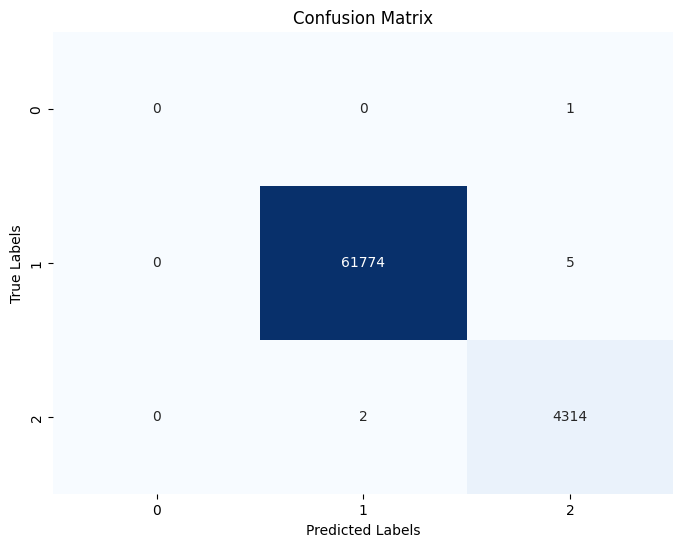

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_all, y_pred_all)

# Step 2: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x_sm,y_sm=smt.fit_resample(df,y)

In [ ]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x_sm,y_sm=smt.fit_resample(df.drop(['machine_status'],axis = 1),y)

0    205836
1    205836
2    205836
Name: count, dtype: int64


<ipython-input-23-14fe8e2f51a0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_sm[0], palette='Blues_d')


<Axes: xlabel='0', ylabel='count'>

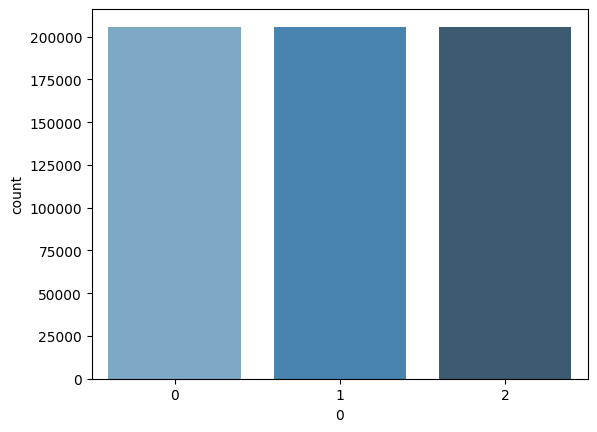

In [ ]:
y_sm = pd.DataFrame(y_sm)

# Print the value counts of y_sm
print(y_sm.value_counts())

# Create the count plot
sns.countplot(x=y_sm[0], palette='Blues_d')

In [ ]:
import seaborn as sns
print(df.machine_status.value_counts())
sns.countplot(x='machine_status',data=y_sm,palette='Blues_d');

In [ ]:
print(df.shape)
print(y.shape)

(220320, 50)
(220320,)


In [ ]:
y_df=pd.DataFrame(y_sm)
y_df.value_counts()

0    205836
1    205836
2    205836
Name: count, dtype: int64

In [ ]:
x_df=pd.DataFrame(x_sm)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_df,y_df, test_size = 0.3,shuffle=True)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(432255, 50)
(185253, 50)
(432255, 1)
(185253, 1)


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 432255 entries, 147053 to 159057
Data columns (total 50 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   sensor_00  432255 non-null  float64
 1   sensor_01  432255 non-null  float64
 2   sensor_02  432255 non-null  float64
 3   sensor_03  432255 non-null  float64
 4   sensor_04  432255 non-null  float64
 5   sensor_05  432255 non-null  float64
 6   sensor_06  432255 non-null  float64
 7   sensor_07  432255 non-null  float64
 8   sensor_08  432255 non-null  float64
 9   sensor_09  432255 non-null  float64
 10  sensor_10  432255 non-null  float64
 11  sensor_11  432255 non-null  float64
 12  sensor_12  432255 non-null  float64
 13  sensor_13  432255 non-null  float64
 14  sensor_14  432255 non-null  float64
 15  sensor_16  432255 non-null  float64
 16  sensor_17  432255 non-null  float64
 17  sensor_18  432255 non-null  float64
 18  sensor_19  432255 non-null  float64
 19  sensor_20  432255 non-n

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, min_samples_split=25, max_depth=14, max_features=10)
model.fit(x_train.to_numpy(),y_train.to_numpy())


In [ ]:
pred=model.predict(x_test)
from sklearn import metrics
acc_score=metrics.accuracy_score(pred,y_test)

In [ ]:
print(acc_score)

In [ ]:
columns=df.columns

In [ ]:
featimp = pd.Series(model.feature_importances_,index=columns).sort_values(ascending=False)
print(featimp)

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [ ]:
# Selecting only the top 10 columns
selected_columns = ['sensor_04', 'sensor_13', 'sensor_10', 'sensor_00', 'sensor_12',
                    'sensor_05', 'sensor_11', 'sensor_49', 'sensor_48', 'sensor_28']

# Modifying x_train and x_test to include only selected columns
x_train_selected = x_train[selected_columns]
x_test_selected = x_test[selected_columns]

In [ ]:
print(x_train_selected.iloc[46180])
print(y_train.iloc[46180])

sensor_04    0.000675
sensor_13    0.000000
sensor_10    0.070291
sensor_00    0.963721
sensor_12    0.000000
sensor_05    1.000000
sensor_11    0.090198
sensor_49    0.019167
sensor_48    0.016216
sensor_28    0.669128
Name: 590141, dtype: float64
0    2
Name: 590141, dtype: int64


In [ ]:
rf_model_selected = RandomForestClassifier(n_estimators=50,
                                          min_samples_split=25,
                                          max_depth=10,
                                          max_features=8)
rf_model_selected.fit(x_train_selected, y_train)
rf_pred_selected = rf_model_selected.predict(x_test_selected)
rf_accuracy_selected = accuracy_score(y_test, rf_pred_selected)

<ipython-input-31-eb330e14d8de>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model_selected.fit(x_train_selected, y_train)


In [ ]:
sensor_values = np.array([[0.000675, 0.000005, 0.070290, 0.963720, 0.000005, 1.000000, 0.090200, 0.019170, 0.016215, 0.669130]])
rf_pred_selected = rf_model_selected.predict(sensor_values)

# Print the predicted class
print("Predicted class:", rf_pred_selected)

Predicted class: [2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
sensor_values = np.array([[[0.000675, 0.00001,0.07029,0.96372,0.00001,1.0000, 0.0902, 0.019,0.016215,0.66913 ]]])
rf_pred_selected = rf_model_selected.predict(sensor_values)

# Print the predicted class
print("Predicted class:", rf_pred_selected)

In [ ]:



# Now, train the models using these modified datasets

# RandomForestClassifier



# XGBoost Classifier
xgb_model_selected = XGBClassifier(n_estimators=200,
                                  max_depth=14,
                                  learning_rate=0.1,
                                  subsample=0.8,
                                  colsample_bytree=0.8,
                                  objective='multi:softmax',
                                  num_class=len(np.unique(y_train)))
xgb_model_selected.fit(x_train_selected, y_train)
xgb_pred_selected = xgb_model_selected.predict(x_test_selected)
xgb_accuracy_selected =accuracy_score(y_test, xgb_pred_selected)

# Logistic Regression Multi-class Classifier
log_reg_model_selected = LogisticRegression(max_iter=1000)
log_reg_model_selected.fit(x_train_selected, y_train)
log_reg_pred_selected = log_reg_model_selected.predict(x_test_selected)
log_reg_accuracy_selected = accuracy_score(y_test, log_reg_pred_selected)

# Print accuracies for models trained on selected columns
print("RandomForestClassifier Accuracy (selected columns):", rf_accuracy_selected)
print("XGBoost Classifier Accuracy (selected columns):", xgb_accuracy_selected)
print("Logistic Regression Accuracy (selected columns):", log_reg_accuracy_selected)


In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Support Vector Machine (SVM) Classifier
svm_model = SVC()
svm_model.fit(x_train_selected, y_train)
svm_pred = svm_model.predict(x_test_selected)
svm_accuracy = accuracy_score(y_test, svm_pred)

# K-Nearest Neighbors (KNN) Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(x_train_selected, y_train)
knn_pred = knn_model.predict(x_test_selected)
knn_accuracy = accuracy_score(y_test, knn_pred)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_selected, y_train)
dt_pred = dt_model.predict(x_test_selected)
dt_accuracy = accuracy_score(y_test, dt_pred)

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train_selected, y_train)
gb_pred = gb_model.predict(x_test_selected)
gb_accuracy = accuracy_score(y_test, gb_pred)

# Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(x_train_selected, y_train)
nb_pred = nb_model.predict(x_test_selected)
nb_accuracy = accuracy_score(y_test, nb_pred)

# Neural Network Classifier (MLP)
mlp_model = MLPClassifier()
mlp_model.fit(x_train_selected, y_train)
mlp_pred = mlp_model.predict(x_test_selected)
mlp_accuracy = accuracy_score(y_test, mlp_pred)

# Print accuracies for additional classifiers
print("Support Vector Machine (SVM) Accuracy:", svm_accuracy)
print("K-Nearest Neighbors (KNN) Accuracy:", knn_accuracy)
print("Decision Tree Classifier Accuracy:", dt_accuracy)
print("Gradient Boosting Classifier Accuracy:", gb_accuracy)
print("Naive Bayes Classifier Accuracy:", nb_accuracy)
print("Neural Network (MLP) Classifier Accuracy:", mlp_accuracy)


In [ ]:
from sklearn.metrics import recall_score, f1_score, confusion_matrix

# Define a function to calculate true negativity
def true_negativity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = np.sum(np.diag(cm)) - np.sum(cm, axis=0)  # Sum of diagonal elements - sum of columns
    return tn / np.sum(cm)

# Calculate metrics for RandomForestClassifier
rf_recall_selected = recall_score(y_test, rf_pred_selected, average='weighted')
rf_f1_selected = f1_score(y_test, rf_pred_selected, average='weighted')
rf_tn_selected = true_negativity(y_test, rf_pred_selected)

# Calculate metrics for XGBoost Classifier
xgb_recall_selected = recall_score(y_test, xgb_pred_selected, average='weighted')
xgb_f1_selected = f1_score(y_test, xgb_pred_selected, average='weighted')
xgb_tn_selected = true_negativity(y_test, xgb_pred_selected)

# Calculate metrics for Logistic Regression Multi-class Classifier
log_reg_recall_selected = recall_score(y_test, log_reg_pred_selected, average='weighted')
log_reg_f1_selected = f1_score(y_test, log_reg_pred_selected, average='weighted')
log_reg_tn_selected = true_negativity(y_test, log_reg_pred_selected)

# Calculate metrics for Support Vector Machine (SVM) Classifier
svm_recall = recall_score(y_test, svm_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')
svm_tn = true_negativity(y_test, svm_pred)

# Calculate metrics for K-Nearest Neighbors (KNN) Classifier
knn_recall = recall_score(y_test, knn_pred, average='weighted')
knn_f1 = f1_score(y_test, knn_pred, average='weighted')
knn_tn = true_negativity(y_test, knn_pred)

# Calculate metrics for Decision Tree Classifier
dt_recall = recall_score(y_test, dt_pred, average='weighted')
dt_f1 = f1_score(y_test, dt_pred, average='weighted')
dt_tn = true_negativity(y_test, dt_pred)

# Calculate metrics for Gradient Boosting Classifier
gb_recall = recall_score(y_test, gb_pred, average='weighted')
gb_f1 = f1_score(y_test, gb_pred, average='weighted')
gb_tn = true_negativity(y_test, gb_pred)

# Calculate metrics for Naive Bayes Classifier
nb_recall = recall_score(y_test, nb_pred, average='weighted')
nb_f1 = f1_score(y_test, nb_pred, average='weighted')
nb_tn = true_negativity(y_test, nb_pred)

# Calculate metrics for Neural Network (MLP) Classifier
mlp_recall = recall_score(y_test, mlp_pred, average='weighted')
mlp_f1 = f1_score(y_test, mlp_pred, average='weighted')
mlp_tn = true_negativity(y_test, mlp_pred)

# Create a table for various metrics
import pandas as pd

metrics_table = pd.DataFrame({
    'Classifier': ['RandomForest', 'XGBoost', 'Logistic Regression', 'SVM', 'KNN',
                   'Decision Tree', 'Gradient Boosting', 'Naive Bayes', 'Neural Network (MLP)'],
    'Accuracy': [rf_accuracy_selected, xgb_accuracy_selected, log_reg_accuracy_selected,
                 svm_accuracy, knn_accuracy, dt_accuracy, gb_accuracy, nb_accuracy, mlp_accuracy],
    'Recall': [rf_recall_selected, xgb_recall_selected, log_reg_recall_selected,
               svm_recall, knn_recall, dt_recall, gb_recall, nb_recall, mlp_recall],
    'F1 Score': [rf_f1_selected, xgb_f1_selected, log_reg_f1_selected,
                 svm_f1, knn_f1, dt_f1, gb_f1, nb_f1, mlp_f1],
    'True Negativity': [rf_tn_selected, xgb_tn_selected, log_reg_tn_selected,
                        svm_tn, knn_tn, dt_tn, gb_tn, nb_tn, mlp_tn]
})

print(metrics_table)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import itertools  # Import itertools module


# Define function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized Confusion Matrix'
    else:
        title = 'Confusion Matrix'

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Calculate confusion matrix for RandomForestClassifier
rf_cm = confusion_matrix(y_test, rf_pred_selected)
plt.figure()
plot_confusion_matrix(rf_cm, classes=np.unique(y_test), normalize=True
        )

# Calculate confusion matrix for XGBoost Classifier
xgb_cm = confusion_matrix(y_test, xgb_pred_selected)
plt.figure()
plot_confusion_matrix(xgb_cm, classes=np.unique(y_test), normalize=True
                     )

# Calculate confusion matrix for Logistic Regression Multi-class Classifier
log_reg_cm = confusion_matrix(y_test, log_reg_pred_selected)
plt.figure()
plot_confusion_matrix(log_reg_cm, classes=np.unique(y_test), normalize=True
                      )

plt.show()


In [ ]:
svm_cm = confusion_matrix(y_test, svm_pred)
plt.figure()
plot_confusion_matrix(svm_cm, classes=np.unique(y_test))


# Calculate confusion matrix for K-Nearest Neighbors (KNN) Classifier
knn_cm = confusion_matrix(y_test, knn_pred)
plt.figure()
plot_confusion_matrix(knn_cm, classes=np.unique(y_test))

# Calculate confusion matrix for Decision Tree Classifier
dt_cm = confusion_matrix(y_test, dt_pred)
plt.figure()
plot_confusion_matrix(dt_cm, classes=np.unique(y_test))


# Calculate confusion matrix for Gradient Boosting Classifier
gb_cm = confusion_matrix(y_test, gb_pred)
plt.figure()
plot_confusion_matrix(gb_cm, classes=np.unique(y_test))


# Calculate confusion matrix for Naive Bayes Classifier
nb_cm = confusion_matrix(y_test, nb_pred)
plt.figure()
plot_confusion_matrix(nb_cm, classes=np.unique(y_test))


# Calculate confusion matrix for Neural Network (MLP) Classifier
mlp_cm = confusion_matrix(y_test, mlp_pred)
plt.figure()
plot_confusion_matrix(mlp_cm, classes=np.unique(y_test))

plt.show()

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Assuming x_train, y_train, x_test, y_test are already defined

# Define parameters for XGBoost
params = {
    'objective': 'multi:softmax',
    'num_class': len(np.unique(y_train)),
    'eval_metric': ['merror']  # Mean classification error for monitoring training performance
}

# Convert data to XGBoost DMatrix format
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# Store evaluation results
evals_result = {}

# Train the model and monitor performance
num_rounds = 100
bst = xgb.train(params, dtrain, num_rounds, evals=[(dtrain, 'train'), (dtest, 'test')],
                evals_result=evals_result, verbose_eval=True)

# Extract training and test error
train_error = evals_result['train']['merror']
test_error = evals_result['test']['merror']

# Plotting
import matplotlib.pyplot as plt

# Plot training vs test error
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_rounds + 1), train_error, label='Training Error')
plt.plot(range(1, num_rounds + 1), test_error, label='Test Error')
plt.xlabel('Number of Rounds')
plt.ylabel('Classification Error')
plt.title('Training vs Test Error Over Time')
plt.legend()
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt

# Initialize Gradient Boosting classifier
gb_model = GradientBoostingClassifier(n_estimators=100)

# Lists to store training and validation metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Train the model and monitor performance
for i in range(100):
    gb_model.fit(x_train_selected, y_train)
    train_pred = gb_model.predict(x_train_selected)
    val_pred = gb_model.predict(x_test_selected)

    train_loss = log_loss(y_train, train_pred)
    val_loss = log_loss(y_test, val_pred)
    train_accuracy = accuracy_score(y_train, train_pred)
    val_accuracy = accuracy_score(y_test, val_pred)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

# Plotting
plt.figure(figsize=(12, 6))

# Plot training vs validation loss
plt.subplot(1, 2, 1)
plt.plot(range(1, 101), train_losses, label='Training Loss')
plt.plot(range(1, 101), val_losses, label='Validation Loss')
plt.xlabel('Number of Iterations')
plt.ylabel('Log Loss')
plt.title('Gradient Boosting: Training vs Validation Loss Over Time')
plt.legend()

# Plot training vs validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, 101), train_accuracies, label='Training Accuracy')
plt.plot(range(1, 101), val_accuracies, label='Validation Accuracy')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Gradient Boosting: Training vs Validation Accuracy Over Time')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train_selected.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')
])

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and monitor performance
history = model.fit(x_train_selected, y_train, epochs=100, validation_data=(x_test_selected, y_test), verbose=0)

# Extract training and validation loss and accuracy
train_losses = history.history['loss']
val_losses = history.history['val_loss']
train_accuracies = history.history['accuracy']
val_accuracies = history.history['val_accuracy']

# Plotting
plt.figure(figsize=(12, 6))

# Plot training vs validation loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Neural Network: Training vs Validation Loss Over Time')
plt.legend()

# Plot training vs validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Neural Network: Training vs Validation Accuracy Over Time')
plt.legend()

plt.tight_layout()
plt.show()
